# Loading the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Module 1: Data Acquisition and Preprocessing:

## 1. Data Acquisition:

### Download the provided historical sales data for the electronics section.

Data is already downloaded and provided as electornics.json. Let's load it into dataframe and print first five entries.

In [3]:
sales_data = pd.read_json('electronics.json')
sales_data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


### Ensure the data includes customer demographics, purchase history, product details, spending amounts, and dates of transactions

Let's check in data if data includes the required columns.

In [4]:
sales_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season'],
      dtype='object')

As the columns showing that all required columns presents.

## 2. Data Cleaning:

### Identify and handle missing values using appropriate techniques like mean/median imputation or dropping rows/columns with excessive missingness.

Let's first check the missing values present.

By seeing dataframe, we can see that missing values represented by "". So, we replace it with np.nan for further procession.

In [5]:
# pd.set_option('display.max_rows', None)
sales_data['Age'].value_counts()
# sales_data['Age'].head(50)

Age
          33
38        28
70        24
20        24
79        24
          ..
41         9
65         9
24         9
Hidden     7
55         7
Name: count, Length: 65, dtype: int64

By checking the data, I've found that there are some empty values and also some 'Hidden' values. Let's check there count.

In [6]:
sales_data.replace('', np.nan).isna().sum()

Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            40
Year                             39
Season                           36
dtype: int64

In [7]:
sales_data.replace('Hidden', np.nan).isna().sum()

Customer_ID                      12
Age                               7
Gender                           15
Income_Level                      9
Address                          15
Transaction_ID                   11
Purchase_Date                    13
Product_ID                        9
Product_Category                 16
Brand                            12
Purchase_Amount                  16
Average_Spending_Per_Purchase    14
Purchase_Frequency_Per_Month     18
Brand_Affinity_Score             14
Product_Category_Preferences     12
Month                            13
Year                             13
Season                           12
dtype: int64

Now let's replace these values with np.nan.

In [8]:
sales_data.replace('', np.nan, inplace=True)
sales_data.replace('Hidden', np.nan, inplace=True)
sales_data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


Now let's count the total missing value in each column.

In [9]:
sales_data.isna().sum()
# sales_data.info()

Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64

Now let's fill these missing values.

In [10]:
sales_data.dropna(subset=['Customer_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier for the data

sales_data['Age'].fillna(sales_data['Age'].median(), inplace=True) # Replace Age missing values with median as age is numerical data

sales_data['Gender'].fillna(sales_data['Gender'].mode()[0], inplace=True) # As Gender is categorical data, replacing its missing values with mode will be the best option
sales_data['Income_Level'].fillna(sales_data['Income_Level'].mode()[0], inplace=True) # As Income Level is categorical, mode will be best for filling values

sales_data.drop("Address", axis=1, inplace=True) # As address is not much important for our analysis, dropping the column will be the best option
sales_data.drop("Transaction_ID", axis=1, inplace=True) # As Transaction ID is not much important for our analysis, dropping the column will be the best option

sales_data['Purchase_Date'].fillna(method='ffill', inplace=True) # Fill Purchase Date with the forward fill

sales_data.dropna(subset=['Product_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier to check the product which sold

sales_data['Product_Category'].fillna(sales_data['Product_Category'].mode()[0], inplace=True)
sales_data['Brand'].fillna(sales_data['Brand'].mode()[0], inplace=True)

sales_data['Purchase_Amount'].fillna(sales_data['Purchase_Amount'].median(), inplace=True)
sales_data['Average_Spending_Per_Purchase'].fillna(sales_data['Average_Spending_Per_Purchase'].median(), inplace=True)
sales_data['Purchase_Frequency_Per_Month'].fillna(sales_data['Purchase_Frequency_Per_Month'].median(), inplace=True)
sales_data['Brand_Affinity_Score'].fillna(sales_data['Brand_Affinity_Score'].median(), inplace=True)

sales_data['Product_Category_Preferences'].fillna(sales_data['Product_Category_Preferences'].mode()[0], inplace=True)
sales_data['Month'].fillna(sales_data['Month'].mode()[0], inplace=True)
sales_data['Year'].fillna(sales_data['Year'].mode()[0], inplace=True)
sales_data['Season'].fillna(sales_data['Season'].mode()[0], inplace=True)

sales_data.reset_index(inplace=True)
sales_data.head()

,index,Customer_ID,Age,Gender,Income_Level,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,04,1995,Winter
2,3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
3,4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
4,5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,08,1989,Spring


In [11]:
sales_data.isna().sum()



index                            0
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

### Analyze outliers and determine whether to retain or remove them based on their impact on the analysis.

In [12]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          910 non-null    int64 
 1   Customer_ID                    910 non-null    object
 2   Age                            910 non-null    object
 3   Gender                         910 non-null    object
 4   Income_Level                   910 non-null    object
 5   Purchase_Date                  910 non-null    object
 6   Product_ID                     910 non-null    object
 7   Product_Category               910 non-null    object
 8   Brand                          910 non-null    object
 9   Purchase_Amount                910 non-null    object
 10  Average_Spending_Per_Purchase  910 non-null    object
 11  Purchase_Frequency_Per_Month   910 non-null    object
 12  Brand_Affinity_Score           910 non-null    object
 13  Produ

In [13]:
# sales_data['Customer_ID'] = sales_data['Customer_ID'].astype('')
sales_data['Age'] = sales_data['Age'].astype('int')
# sales_data['Gender'] = sales_data['Gender'].astype('')
# sales_data['Income_Level'] = sales_data['Income_Level'].astype('')
# sales_data['Address'] = sales_data['Address'].astype('')
# sales_data['Transaction_ID'] = sales_data['Transaction_ID'].astype('')
sales_data['Purchase_Date'] = sales_data['Purchase_Date'].astype('datetime64[ns]')
# sales_data['Product_ID'] = sales_data['Product_ID'].astype('')
# sales_data['Product_Category'] = sales_data['Product_Category'].astype('')
# sales_data['Brand'] = sales_data['Brand'].astype('')
sales_data['Purchase_Amount'] = sales_data['Purchase_Amount'].astype('int')
sales_data['Average_Spending_Per_Purchase'] = sales_data['Average_Spending_Per_Purchase'].astype('int')
sales_data['Purchase_Frequency_Per_Month'] = sales_data['Purchase_Frequency_Per_Month'].astype('int')
sales_data['Brand_Affinity_Score'] = sales_data['Brand_Affinity_Score'].astype('int')
# sales_data['Product_Category_Preferences'] = sales_data['Product_Category_Preferences'].astype('')
sales_data['Month'] = sales_data['Month'].astype('int')
sales_data['Year'] = sales_data['Year'].astype('int')
# sales_data['Season'] = sales_data['Season'].astype('')

In [14]:
description = sales_data.describe()
IQR = description.loc['75%'] - description.loc['25%']
integer_columns = sales_data.select_dtypes(include='int').columns
for column in integer_columns:
    lower_bound = description.loc['25%', column] - 1.5 * IQR[column]
    upper_bound = description.loc['75%', column] + 1.5 * IQR[column]
    filtered_values = sales_data[~((sales_data[column] >= lower_bound) & (sales_data[column] <= upper_bound))][column]
    print("Values between {} and {}: {}".format(lower_bound, upper_bound, filtered_values.tolist()))

Values between -504.5 and 1497.5: []
Values between -11.5 and 112.5: []
Values between -206.5 and 709.5: []
Values between -37.0 and 139.0: []
Values between -4.5 and 15.5: []
Values between -4.5 and 15.5: []
Values between -3.5 and 16.5: []
Values between 1947.5 and 2047.5: []


We can see that no outlier present here.

###  Address inconsistencies in data format and encoding.

Now check the inconsistencies in the data format and encoding.

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          910 non-null    int64         
 1   Customer_ID                    910 non-null    object        
 2   Age                            910 non-null    int32         
 3   Gender                         910 non-null    object        
 4   Income_Level                   910 non-null    object        
 5   Purchase_Date                  910 non-null    datetime64[ns]
 6   Product_ID                     910 non-null    object        
 7   Product_Category               910 non-null    object        
 8   Brand                          910 non-null    object        
 9   Purchase_Amount                910 non-null    int32         
 10  Average_Spending_Per_Purchase  910 non-null    int32         
 11  Purchase_Frequency_

As all is in objects, let's convert them to their respective format for proper precessing.

In [16]:
# sales_data['Customer_ID'] = sales_data['Customer_ID'].astype('')
sales_data['Age'] = sales_data['Age'].astype('int')
# sales_data['Gender'] = sales_data['Gender'].astype('')
# sales_data['Income_Level'] = sales_data['Income_Level'].astype('')
# sales_data['Address'] = sales_data['Address'].astype('')
# sales_data['Transaction_ID'] = sales_data['Transaction_ID'].astype('')
sales_data['Purchase_Date'] = sales_data['Purchase_Date'].astype('datetime64[ns]')
# sales_data['Product_ID'] = sales_data['Product_ID'].astype('')
# sales_data['Product_Category'] = sales_data['Product_Category'].astype('')
# sales_data['Brand'] = sales_data['Brand'].astype('')
sales_data['Purchase_Amount'] = sales_data['Purchase_Amount'].astype('int')
sales_data['Average_Spending_Per_Purchase'] = sales_data['Average_Spending_Per_Purchase'].astype('int')
sales_data['Purchase_Frequency_Per_Month'] = sales_data['Purchase_Frequency_Per_Month'].astype('int')
sales_data['Brand_Affinity_Score'] = sales_data['Brand_Affinity_Score'].astype('int')
# sales_data['Product_Category_Preferences'] = sales_data['Product_Category_Preferences'].astype('')
sales_data['Month'] = sales_data['Month'].astype('int')
sales_data['Year'] = sales_data['Year'].astype('int')
# sales_data['Season'] = sales_data['Season'].astype('')

## 3. Data Transformation:

### Create new features that provide deeper insights into customer behavior, such as:
* Average spending per purchase
* Purchase frequency per month
* Brand affinity score (based on product brand preferences)
* Product category preferences (e.g., TVs, smartphones, laptops)

In [17]:
sales_data.columns

Index(['index', 'Customer_ID', 'Age', 'Gender', 'Income_Level',
       'Purchase_Date', 'Product_ID', 'Product_Category', 'Brand',
       'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season'],
      dtype='object')

We can check that all of these are already present.

### Standardize or normalize numeric features to ensure they contribute equally to the clustering algorithms.

Now let's standerdize the numeric features.

In [18]:
integer_columns = sales_data.select_dtypes(include='int').columns
for column in integer_columns:
    sales_data[column] = (sales_data[column] - sales_data[column].mean()) / sales_data[column].std()

In [19]:
sales_data.head(2)

,index,Customer_ID,Age,Gender,Income_Level,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,-1.734448,b81ee6c9-2ae4-48a7-b283-220eaa244f43,-0.549891,Female,Medium,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,-0.407459,0.278761,-1.244885,-1.211692,Low,-1.584554,0.864915,Winter
1,-1.727492,fdf79bcd-5908-4c90-8501-570ffb5b7648,0.399318,Other,Low,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,-0.378231,1.818217,1.303289,-1.573925,Low,-0.703170,-0.139688,Winter


# Module 2: Exploratory Data Analysis(EDA):

## 1. Univariate Analysis:

### Analyze the distribution of key features like customer age, purchase amount, and purchase frequency using histograms, boxplots, and descriptive statistics.

Let's analyze the key features using histogram, boxplots and descriptive statistice.

In [20]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          910 non-null    float64       
 1   Customer_ID                    910 non-null    object        
 2   Age                            910 non-null    float64       
 3   Gender                         910 non-null    object        
 4   Income_Level                   910 non-null    object        
 5   Purchase_Date                  910 non-null    datetime64[ns]
 6   Product_ID                     910 non-null    object        
 7   Product_Category               910 non-null    object        
 8   Brand                          910 non-null    object        
 9   Purchase_Amount                910 non-null    float64       
 10  Average_Spending_Per_Purchase  910 non-null    float64       
 11  Purchase_Frequency_

# A. K-Means Clustering:

### 1. Define the number of clusters (k):

#### Analyze the elbow plot to determine the optimal number of clusters based on the sum of squared distances within each cluster.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

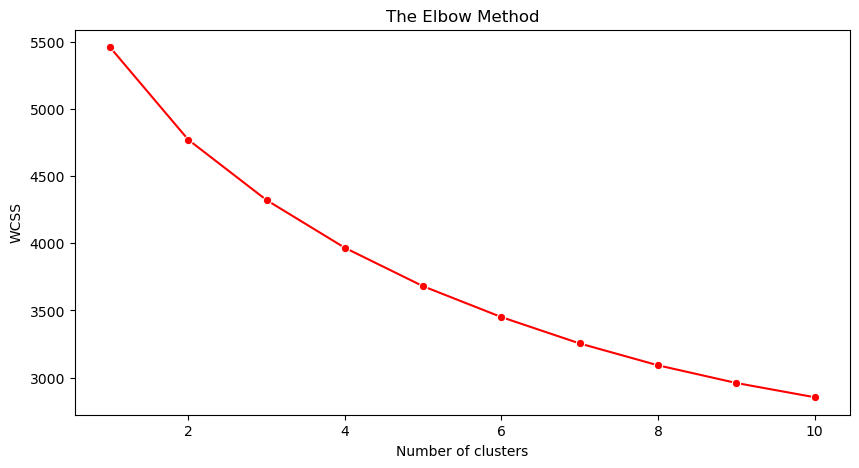

In [52]:

# Selecting features for clustering
# features_for_clustering = ['Age','Purchase_Amount', 'Brand_Affinity_Score']

features_for_clustering = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Year','Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(sales_data[features_for_clustering])

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


# Plotting the elbow method
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# sales_data.columns

#### Consider silhouette analysis to evaluate the quality of clusters formed at different k values.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

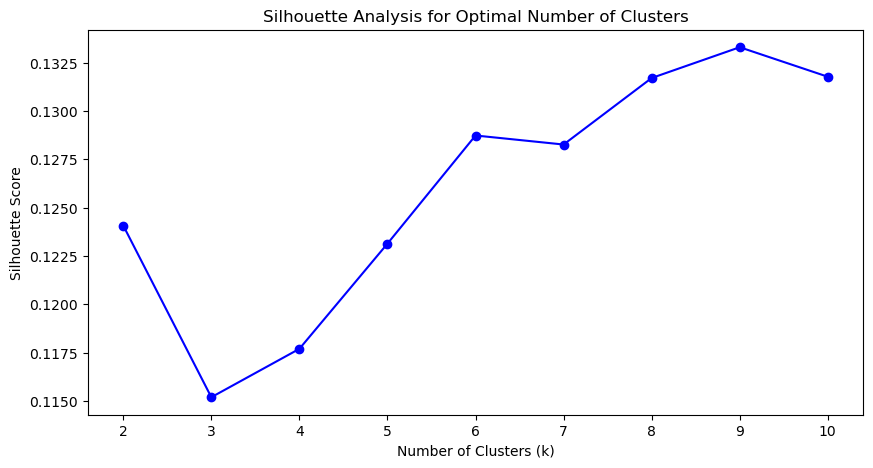

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features_for_clustering = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Year','Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(sales_data[features_for_clustering])

# Range of k values to try
k_values = range(2, 11)

# List to store silhouette scores for each k
silhouette_scores = []

for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    # Predict clusters
    clusters = kmeans.predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


### 2. Apply K-Means algorithm:

#### Implement K-Means with the chosen k value to segment customers into distinct clusters based on their purchase behavior and preferences.

In [54]:

# Selecting features for clustering
features_for_clustering = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Year','Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(sales_data[features_for_clustering])

# Chosen k value 
chosen_k = 9

# Fit K-Means clustering with the chosen k value using random initialization
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(X)

# Display the cluster assignments
print("Cluster Assignments:")
print(sales_data['Cluster'].value_counts())

# Optionally, you can explore the characteristics of each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features_for_clustering)
cluster_centers['Cluster'] = range(1, chosen_k + 1)
print("\nCluster Centers:")
print(cluster_centers)




c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Assignments:
Cluster
6    116
4    115
7    103
8    101
5     98
0     97
2     94
3     94
1     92
Name: count, dtype: int64

Cluster Centers:
        Age  Purchase_Amount  Average_Spending_Per_Purchase      Year  \
0 -0.459517        -0.593905                       0.912814 -0.567075   
1 -0.908575        -0.617143                      -0.764413 -0.802871   
2  0.446244         0.544495                       0.526815 -0.989681   
3 -0.643742         0.961781                      -0.586035  0.902676   
4  0.818815        -0.769260                      -0.624017  0.655259   
5  0.322401        -0.610122                      -0.051123 -0.102100   
6  0.252990         0.625624                      -0.845081 -0.644876   
7 -0.958630        -0.369079                       0.773078  0.688703   
8  0.894653         0.856393                       0.817069  0.748209   

   Purchase_Frequency_Per_Month  Brand_Affinity_Score  Cluster  
0                     -0.468049              0.913

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


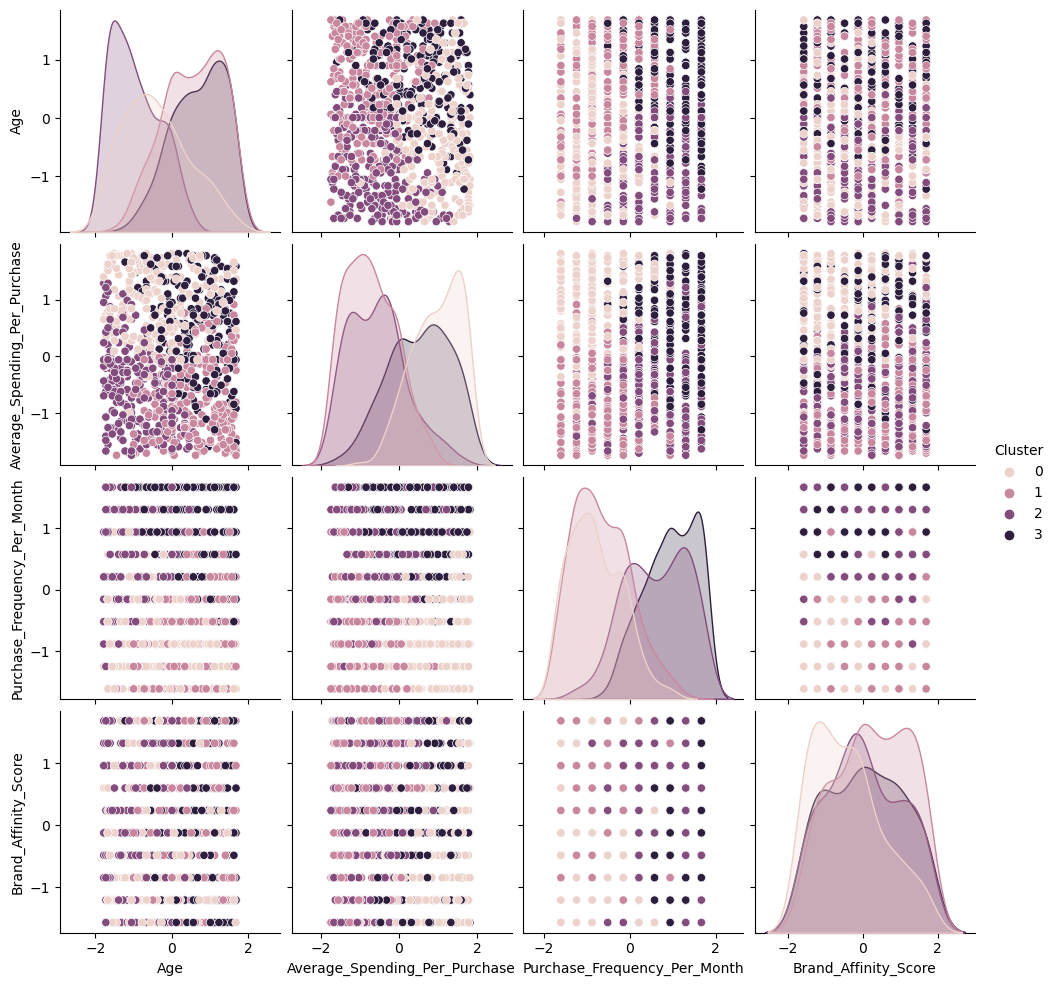

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'sales_data' with your preprocessed data
# ...

# Selecting features for clustering
features_for_clustering = ['Age',  'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(sales_data[features_for_clustering])

# Chosen k value (replace with your optimal k)
chosen_k = 4

# Fit K-Means clustering with the chosen k value using random initialization
kmeans = KMeans(n_clusters=chosen_k, init='random', random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters using a pair plot for selected features
sns.pairplot(sales_data, hue='Cluster', vars=features_for_clustering)
plt.show()

# Optionally, you can perform further analysis based on the clusters
# ...

# Save the clustered results to a new DataFrame
clustered_data = sales_data.copy()

# If needed, you can drop the original features used for clustering to keep only the cluster labels
# clustered_data.drop(features_for_clustering, axis=1, inplace=True)

# Save the results to a new CSV file
clustered_data.to_csv('clustered_sales_data.csv', index=False)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Profiles:
              Age  Purchase_Amount  Average_Spending_Per_Purchase  \
Cluster                                                             
0        0.880385        -0.829584                      -0.112361   
1       -0.888442        -0.459039                      -0.556124   
2        0.351427         1.036473                      -0.372907   
3       -0.376038         0.083682                       1.097813   

         Purchase_Frequency_Per_Month  Brand_Affinity_Score  
Cluster                                                      
0                           -0.235390              0.232212  
1                            0.450054             -0.206944  
2                            0.198265              0.384714  
3                           -0.448994             -0.462527  


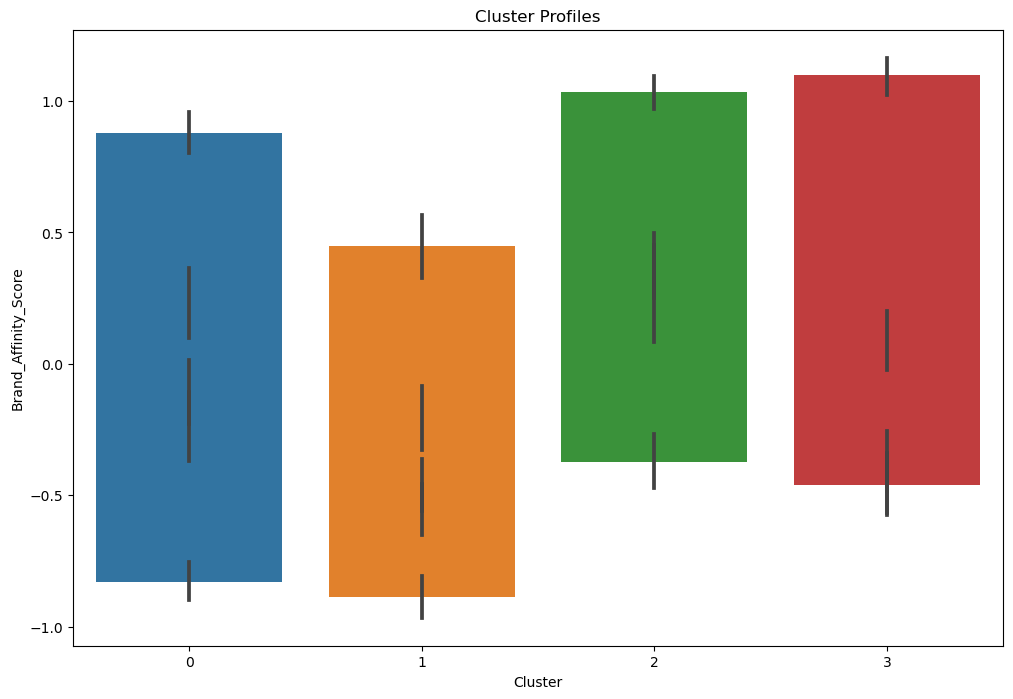

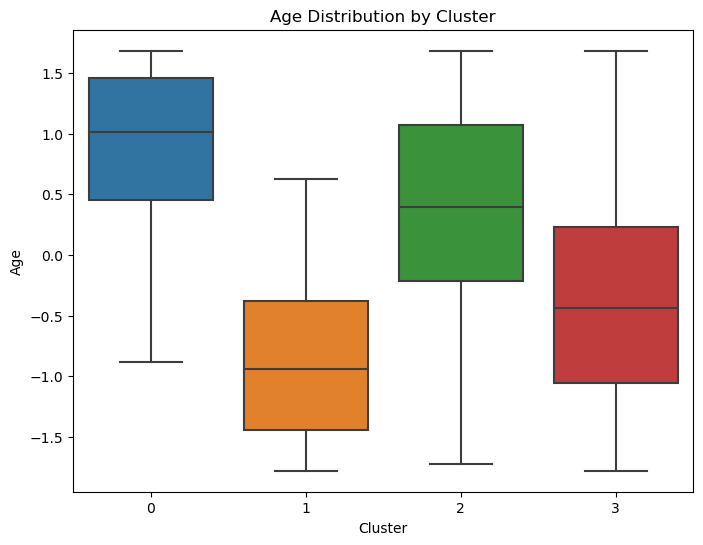

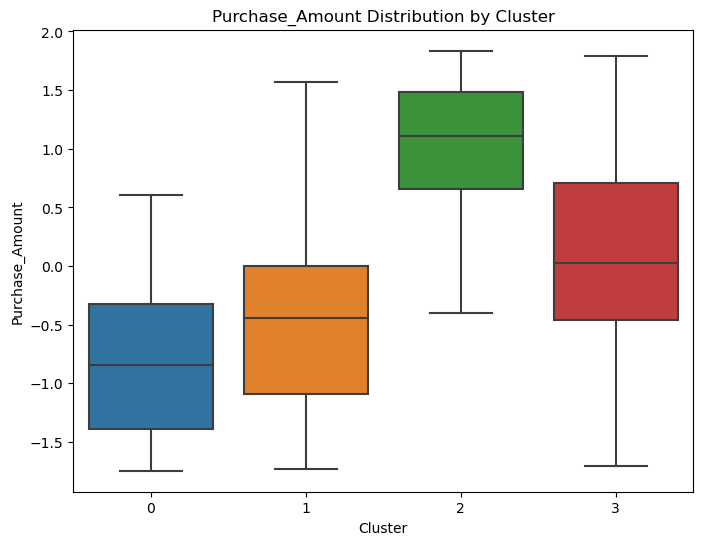

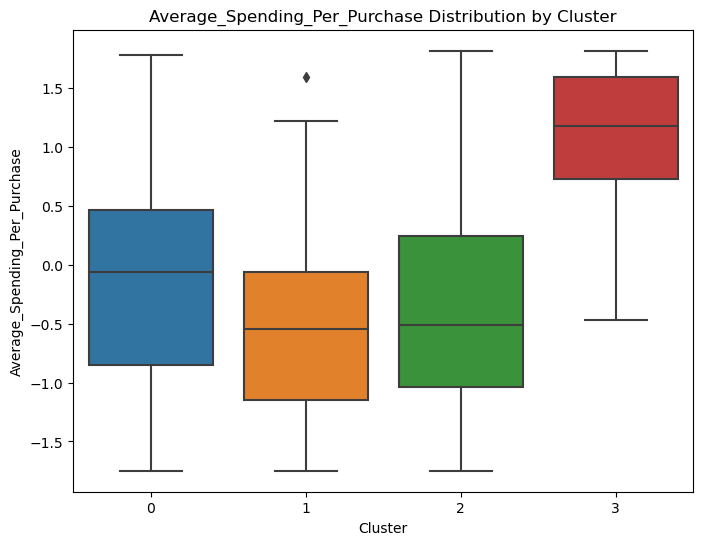

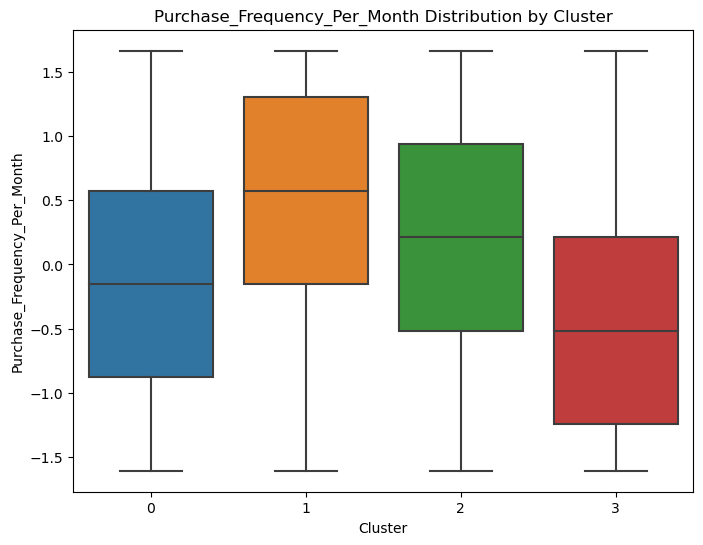

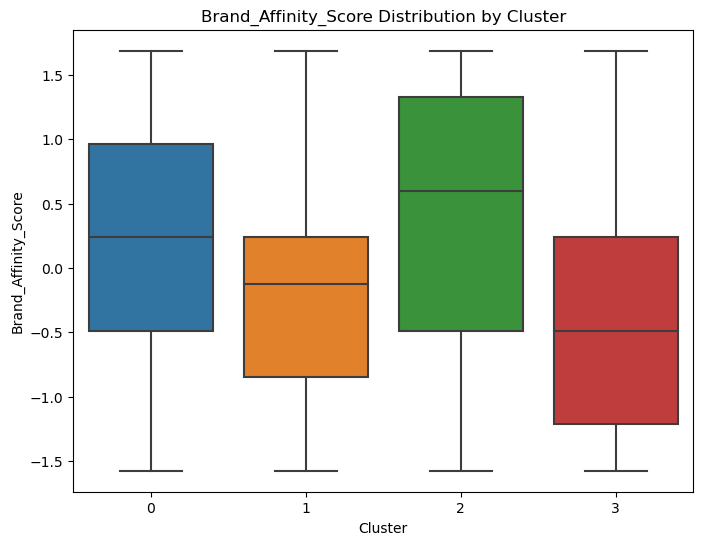

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'sales_data' with your preprocessed data
# ...

# Selecting features for clustering
features_for_clustering = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(sales_data[features_for_clustering])

# Chosen k value (replace with your optimal k)
chosen_k = 4

# Fit K-Means clustering with the chosen k value using random initialization
kmeans = KMeans(n_clusters=chosen_k, init='random', random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(X)

# Further Analysis

# 1. Cluster Profiling
cluster_profiles = sales_data.groupby('Cluster')[features_for_clustering].mean()
print("\nCluster Profiles:")
print(cluster_profiles)

# 2. Visualize Cluster Profiles
plt.figure(figsize=(12, 8))
for feature in features_for_clustering:
    sns.barplot(x='Cluster', y=feature, data=sales_data)
plt.title('Cluster Profiles')
plt.show()

# 3. Compare Clusters
for feature in features_for_clustering:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=sales_data)
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()
 

# Save the updated DataFrame with cluster labels
sales_data.to_csv('clustered_sales_data_with_analysis.csv', index=False)


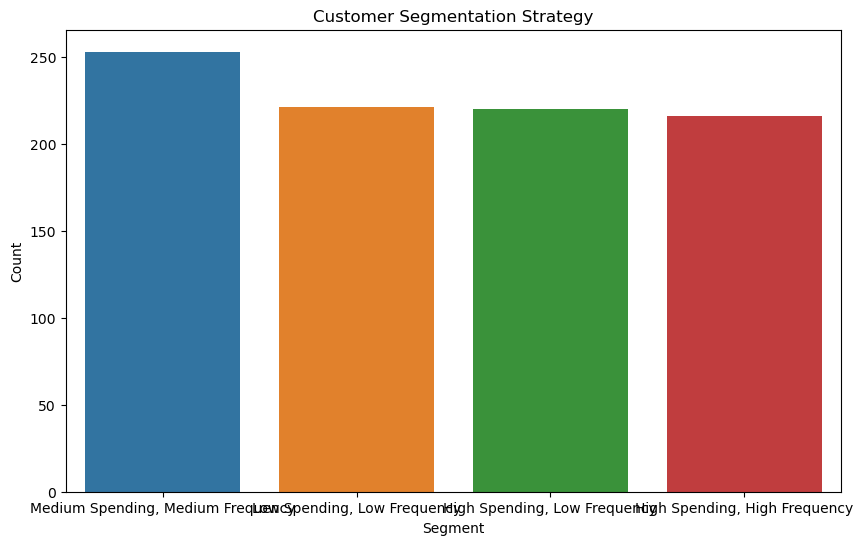

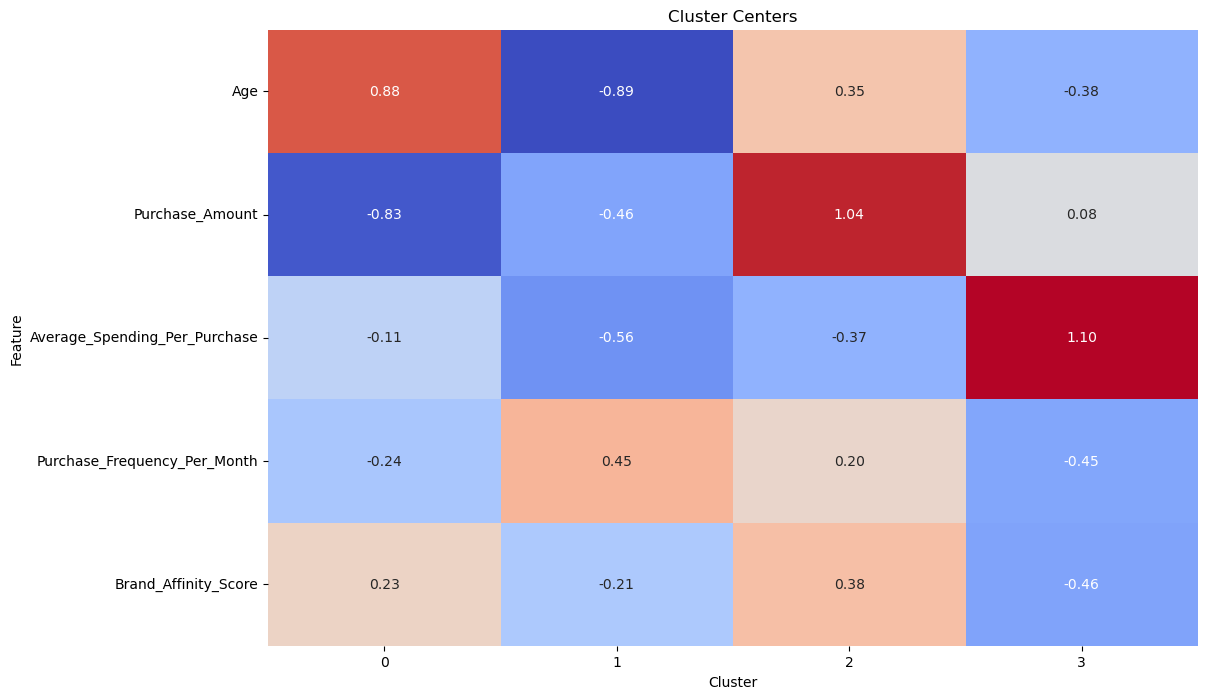

In [47]:
# 5. Customer Segmentation Strategy
# Implementing a simple customer segmentation strategy based on cluster characteristics

segmentation_strategy = {
    0: 'High Spending, High Frequency',
    1: 'Low Spending, Low Frequency',
    2: 'Medium Spending, Medium Frequency',
    3: 'High Spending, Low Frequency'
}

sales_data['Segment'] = sales_data['Cluster'].map(segmentation_strategy)

# Visualize the segmentation strategy
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=sales_data, order=sales_data['Segment'].value_counts().index)
plt.title('Customer Segmentation Strategy')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()




cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features_for_clustering)
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers.T, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


# Save the updated DataFrame with cluster labels and segmentation
sales_data.to_csv('clustered_sales_data_with_analysis.csv', index=False)
